# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-11-09 14:00:08.261697


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/8/20


,11/8/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,9934089,237570,2.39
Brazil,5664115,162397,2.87
India,8553657,126611,1.48
Mexico,967825,95027,9.82
United Kingdom,1195350,49134,4.11
Italy,935104,41394,4.43
France,1835187,40490,2.21


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 11/8/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
51097,US,9700201,2020-11-06,236073.0,1146.0,126180.0,98259.000000
51096,US,9574021,2020-11-05,234927.0,1210.0,121786.0,94369.000000
51095,US,9452235,2020-11-04,233717.0,1097.0,102811.0,89551.285714
51094,US,9349424,2020-11-03,232620.0,1130.0,91104.0,86054.571429
51093,US,9258320,2020-11-02,231490.0,491.0,83442.0,83544.428571
51092,US,9174878,2020-11-01,230999.0,401.0,73464.0,81142.285714
51091,US,9101414,2020-10-31,230598.0,908.0,89026.0,79254.428571


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/8/20


,11/8/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,529036,33694.0,6.37
Texas,990930,19184.0,1.94
California,972713,17973.0,1.85
Florida,843897,17121.0,2.03
New Jersey,254595,16429.0,6.45
Illinois,487987,10538.0,2.16
Massachusetts,171399,10149.0,5.92


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 11/8/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1749,California,963211,2020-11-06,17931.0,71.0,6357.0,5026.142857
1748,California,956854,2020-11-05,17860.0,52.0,5934.0,4743.714286
1747,California,950920,2020-11-04,17808.0,63.0,5519.0,4520.571429
1746,California,945401,2020-11-03,17745.0,56.0,4990.0,4359.000000
1745,California,940411,2020-11-02,17689.0,18.0,4533.0,4281.857143
1744,California,935878,2020-11-01,17671.0,12.0,3735.0,4183.142857
1743,California,932143,2020-10-31,17659.0,41.0,4115.0,4065.571429


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 11/8/20


,11/8/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,319977,7170.0,2.24
Orange,62255,1509.0,2.42
Riverside,71153,1333.0,1.87
San Bernardino,68721,1096.0,1.59
San Diego,59682,908.0,1.52
Sacramento,27773,508.0,1.83
San Joaquin,22635,494.0,2.18


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 11/8/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5545,Los Angeles,317656,2020-11-06,7157.0,17.0,2092.0,1618.428571
5544,Los Angeles,315564,2020-11-05,7140.0,23.0,2038.0,1499.142857
5543,Los Angeles,313526,2020-11-04,7117.0,20.0,1781.0,1451.000000
5542,Los Angeles,311745,2020-11-03,7097.0,21.0,1150.0,1381.142857
5541,Los Angeles,310595,2020-11-02,7076.0,2.0,1405.0,1425.857143
5540,Los Angeles,309190,2020-11-01,7074.0,3.0,1572.0,1347.142857
5539,Los Angeles,307618,2020-10-31,7071.0,15.0,1291.0,1240.142857
5538,Los Angeles,306327,2020-10-30,7056.0,12.0,1257.0,1358.000000
5537,Los Angeles,305070,2020-10-29,7044.0,4.0,1701.0,1572.142857
5536,Los Angeles,303369,2020-10-28,7040.0,13.0,1292.0,1840.428571



7 day new US cases as of 11/8/20


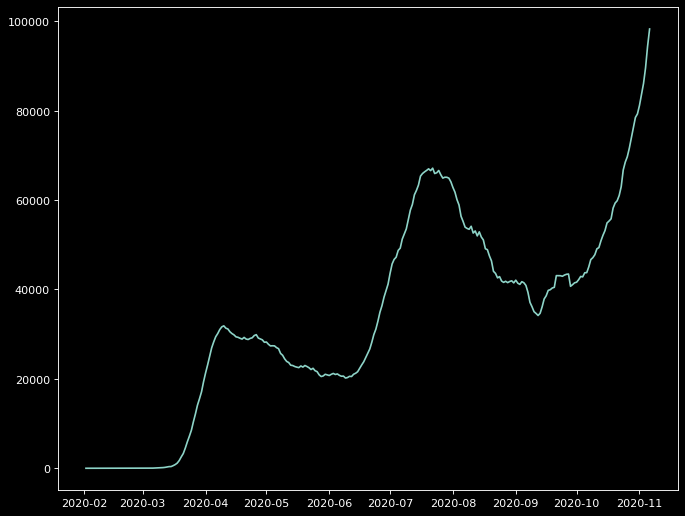

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 11/8/20


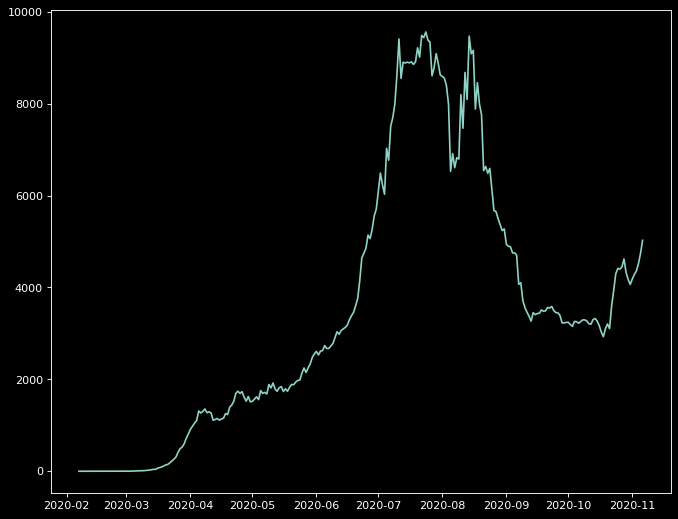

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 11/8/20


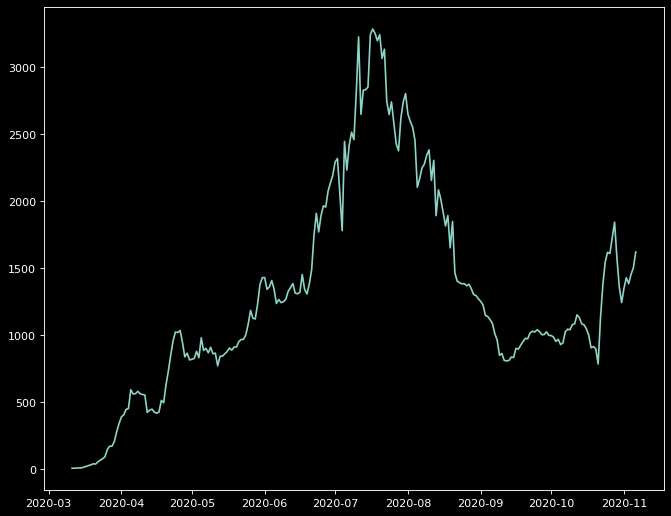

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()